In [7]:
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(12.2,8.3)})

In [8]:
#loading datasets, deleting columns that are empty
df = pd.read_csv("Data/Guething_006116832A.csv");
del df['Unnamed: 63']
del df['Additions']
del df['Applications 17/03/2016-09/06/2016']
del df['Duplicates (% of applications received) .2']
del df['Duplicate applications received 08/06/2016 - 09/06/2016']
del df['Applications received 08/06/2016-09/06/2016']
del df['Appliations received after the deadline']
df = df.fillna(0)
df.head(10)

,Area ID,ONS area code,Electoral Region,Region Code,Voting Area,Electorate,Votes cast,Valid votes cast,Ballot Box Turnout,Valid votes turnout,...,Duplicates (% of applications received) .1,01/12/2015-14/05/2016,15/05/2016-09/06/2016,Applications received after the deadline,People who tried to vote but were found not to be registered,Proportion of electorate issued with a postal vote (%),Polling station turnout (%),Postal vote turnout (%) (envelopes returned / envelopes issued),Remain,Leave
0,148,S92000003,Scotland,S12000033,Aberdeen City,"154,266","104,809","104,714",67.9,67.9,...,18%,648,465,16,2.0,32%,71%,79%,63985,40729
1,149,S92000003,Scotland,S12000034,Aberdeenshire,"196,809","139,014","138,961",70.6,70.6,...,47%,"8,871","1,820",901,11.0,15%,61%,83%,76445,62516
2,368,E12000008,South East,E07000223,Adur,"48,755","37,251","37,229",76.4,76.4,...,59%,"8,882","7,867","3,000",299.0,22%,69%,85%,16914,20315
3,189,E12000002,North West,E07000026,Allerdale,"74,426","54,268","54,238",72.9,72.9,...,41%,"8,081","4,908","1,302",7.0,18%,73%,88%,22429,31809
4,195,E12000004,East Midlands,E07000032,Amber Valley,"96,760","73,864","73,820",76.3,76.3,...,33%,"17,316","5,814","2,248",0.0,13%,63%,83%,29319,44501
5,150,S92000003,Scotland,S12000041,Angus,"87,137","59,282","59,258",68.0,68.0,...,41%,"13,570","4,505",951,75.0,18%,77%,90%,32747,26511
6,151,S92000003,Scotland,S12000035,Argyll and Bute,"66,642","48,734","48,696",73.1,73.1,...,3%,"8,021","5,988",458,15.0,18%,63%,76%,29494,19202
7,369,E12000008,South East,E07000224,Arun,"117,138","91,199","91,129",77.9,77.8,...,44%,"18,420","4,139","1,533",53.0,18%,67%,85%,34193,56936
8,320,E12000004,East Midlands,E07000170,Ashfield,"91,916","66,946","66,899",72.8,72.8,...,43%,"24,768","4,522","1,425",27.0,14%,68%,86%,20179,46720
9,261,E12000008,South East,E07000105,Ashford,"90,516","69,827","69,786",77.1,77.1,...,44%,"12,982","2,893","1,110",290.0,13%,67%,86%,28314,41472


In [9]:
#creating separate dataframe to count invalid vounts
#Note: Two files were put together via mac terminal commands
col_names =  ['Voting Area','Electorate','Votes Cast', 'Valid Votes']
my_df  = pd.DataFrame(columns = col_names)
my_df['Electorate'] = df['Electorate'].str.replace(',', '').astype(int)
my_df['Voting Area'] = df['Voting Area']
my_df['Votes Cast'] = df['Votes cast'].str.replace(',', '').astype(int)
my_df['Valid Votes'] = df['Valid votes cast'].str.replace(',', '').astype(int)
my_df['Invalid Votes Count'] = my_df['Votes Cast'] - my_df['Valid Votes']

In [10]:
#creating sample
col_names2 =  ['Electorate','Voting Area','No DOB', 'No Signature', 'Mismatched Signature','Both DOB and Signature mismatched']
sample2  = pd.DataFrame(columns = col_names2)
sample2['Electorate'] = df['Electorate'].str.replace(',', '').astype(int)
sample2['Voting Area'] = df['Voting Area']
sample2['No DOB'] = df['No DOB']
sample2['No Signature'] = df['No signature']
sample2['Mismatched DOB'] = df['Mismatched DOB']
sample2['Mismatched Signature'] = df['Mismatched signature']
sample2['Both DOB and Signature mismatched'] = df['Both mismatched']
sample2['All Added'] = df['Both mismatched'] + sample2['Mismatched Signature'] +sample2['No DOB'] +sample2['No Signature'] + df['Mismatched DOB']
sample2.sort_values("All Added")


,Electorate,Voting Area,No DOB,No Signature,Mismatched Signature,Both DOB and Signature mismatched,Mismatched DOB,All Added
380,77878,Wyre Forest,0.0,0.0,0.0,0.0,0.0,0.0
100,71966,East Dorset,0.0,0.0,6.0,0.0,1.0,7.0
0,154266,Aberdeen City,2.0,3.0,4.0,0.0,2.0,11.0
173,108838,Kingston upon Thames,0.0,2.0,11.0,0.0,0.0,13.0
229,96091,Norwich,2.0,7.0,7.0,3.0,1.0,20.0
381,155157,York,0.0,0.0,23.0,0.0,0.0,23.0
170,70570,Kettering,4.0,7.0,15.0,0.0,9.0,35.0
189,338064,Manchester,4.0,6.0,3.0,2.0,23.0,38.0
238,110224,Perth and Kinross,0.0,0.0,3.0,10.0,30.0,43.0
335,68957,Torfaen,1.0,1.0,16.0,12.0,14.0,44.0


Text(0.5, 1.0, 'Invalid Vote Count versus Electorate Size')

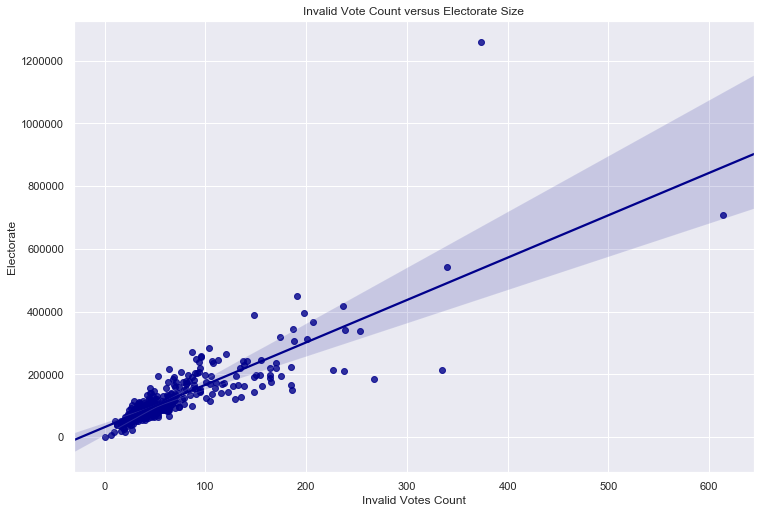

In [11]:
#comparing electorates and invalid votes
sns.regplot(x='Invalid Votes Count', y="Electorate", color="DarkBlue", data=my_df,)
plt.title('Invalid Vote Count versus Electorate Size')

<Figure size 1152x576 with 0 Axes>

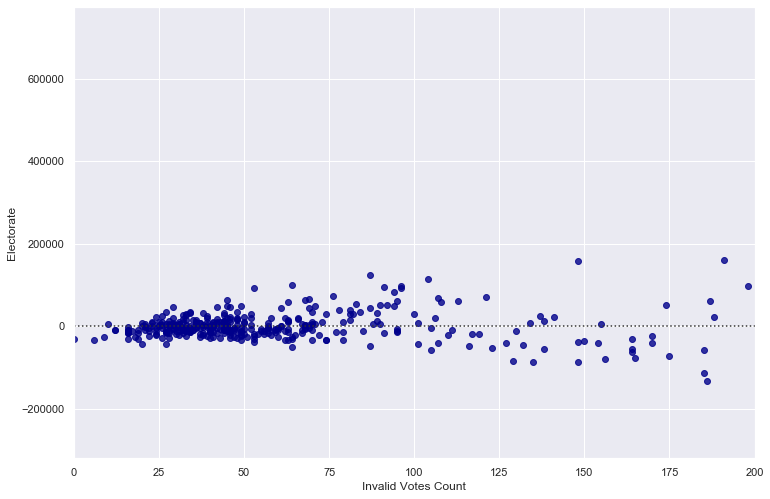

<Figure size 1152x576 with 0 Axes>

In [12]:
#determining residuals
sns.residplot(x='Invalid Votes Count', y="Electorate",color="DarkBlue",data=my_df);
plt.xlim(0,200)
plt.figure(figsize=(16, 8))

In [13]:
#determining linear regression equation from line 34
X = my_df['Invalid Votes Count'].values.reshape(-1,1)
y = my_df['Electorate'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("Linear Line Equation -> y = {:.5} + {:.5}x".format(reg.intercept_[0], reg.coef_[0][0]))

Linear Line Equation -> y = 3.2024e+04 + 1351.3x


In [14]:
#looking at R-Squared Values and P vales
X = my_df['Invalid Votes Count']
y = my_df['Electorate']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Electorate   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     826.5
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           2.32e-97
Time:                        22:40:17   Log-Likelihood:                -4707.4
No. Observations:                 382   AIC:                             9419.
Df Residuals:                     380   BIC:                             9427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.202e+04   4

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 1.0, 'Major Outliers')

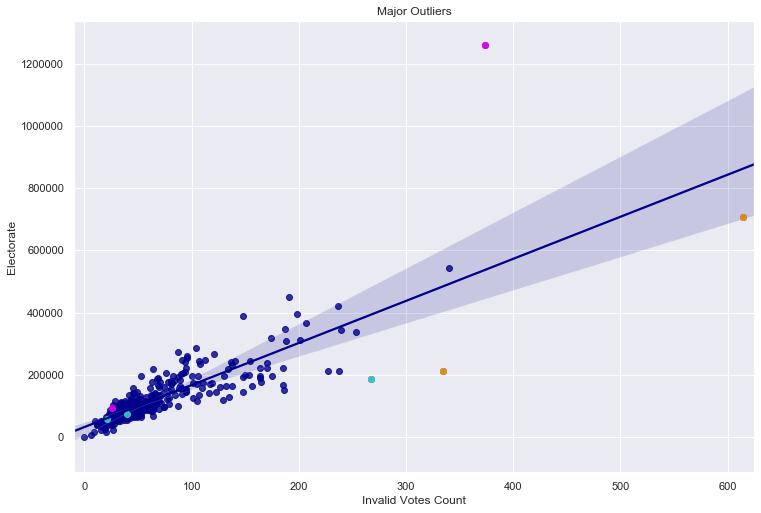

In [22]:
#looking at outliers
sns.regplot(x='Invalid Votes Count', y="Electorate", color="DarkBlue", data=my_df)
new = my_df[my_df['Voting Area'].str.contains(r'^Northern')].copy()
sns.regplot(x='Invalid Votes Count', y="Electorate", color="Magenta", data=new, fit_reg=False)

new = my_df[my_df['Voting Area'].str.contains(r'^Birmingham')].copy()
sns.regplot(x='Invalid Votes Count', y="Electorate", color="Orange", data=new, fit_reg=False)

new = my_df[my_df['Voting Area'].str.contains(r'^Leicester')].copy()
sns.regplot(x='Invalid Votes Count', y="Electorate", color="Orange", data=new, fit_reg=False)

new = my_df[my_df['Voting Area'].str.contains(r'^Brent')].copy()
sns.regplot(x='Invalid Votes Count', y="Electorate", color="turquoise", data=new, fit_reg=False)

new = my_df[my_df['Voting Area'].str.contains(r'Bromsgrove')].copy()
sns.regplot(x='Invalid Votes Count', y="Electorate", color="turquoise", data=new, fit_reg=False)

new = my_df[my_df['Voting Area'].str.contains(r'East Ayrshire')].copy()
sns.regplot(x='Invalid Votes Count', y="Electorate", color="Magenta", data=new, fit_reg=False)

plt.xlim(-10,625)
plt.title('Major Outliers')

Text(0.5, 1.0, 'Both Mismatched Signature & DOB versus Electorate Size')

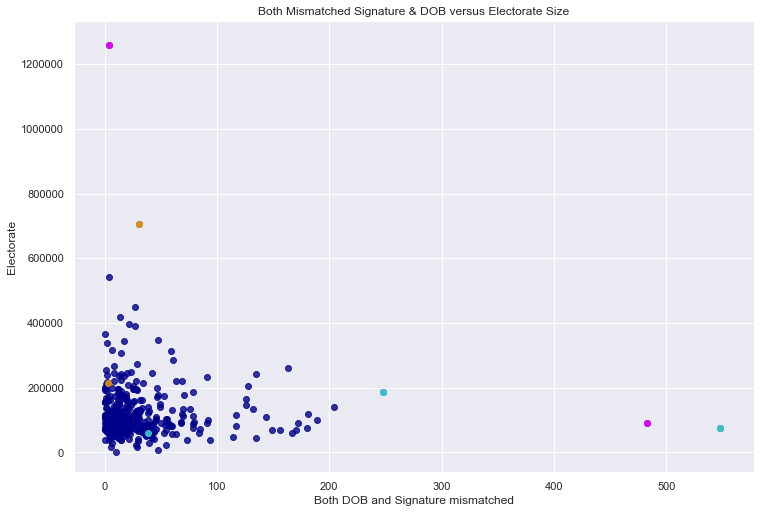

In [23]:
#More Outliers for Voting Reasons
sns.regplot(x='Both DOB and Signature mismatched', y="Electorate", color="DarkBlue",fit_reg = False, data= sample2)

new = sample2[sample2['Voting Area'].str.contains(r'^Bromsgrove')].copy()
sns.regplot(x='Both DOB and Signature mismatched', y="Electorate", color="turquoise",fit_reg = False, data=new)

new = sample2[sample2['Voting Area'].str.contains(r'^East Ayrshire')].copy()
sns.regplot(x='Both DOB and Signature mismatched', y="Electorate", color="Magenta",fit_reg = False, data=new)

new = sample2[sample2['Voting Area'].str.contains(r'^Northern')].copy()
sns.regplot(x='Both DOB and Signature mismatched', y="Electorate", color="Magenta",fit_reg = False, data=new)

new = sample2[sample2['Voting Area'].str.contains(r'^Birmingham')].copy()
sns.regplot(x='Both DOB and Signature mismatched', y="Electorate", color="Orange",fit_reg = False, data=new)

new = sample2[sample2['Voting Area'].str.contains(r'^Leicester')].copy()
sns.regplot(x='Both DOB and Signature mismatched', y="Electorate", color="Orange",fit_reg = False, data=new)

new = sample2[sample2['Voting Area'].str.contains(r'^Brent')].copy()
sns.regplot(x='Both DOB and Signature mismatched', y="Electorate", color="turquoise",fit_reg = False, data=new)

plt.title('Both Mismatched Signature & DOB versus Electorate Size')

In [13]:
#Dataset for Analysis of Rural versus Urban
col_names =  ['Voting Area','Remain Votes', 'Leave Votes','Electorate']
df2  = pd.DataFrame(columns = col_names)
df2['Voting Area'] = df['Voting Area']
df2['Remain Votes'] = df['Remain']
df2['Leave Votes'] = df['Leave']
df2['Electorate'] = df['Electorate'].str.replace(',', '').astype(int)
df2["Decision Margin"] = df2["Remain Votes"] - df2["Leave Votes"]
df2["Decided to Leave?"] = df2["Remain Votes"] < df2["Leave Votes"]
df2.sort_values("Electorate")

,Voting Area,Remain Votes,Leave Votes,Electorate,Decision Margin,Decided to Leave?
167,Isles of Scilly,803,621,1799,182,False
71,City of London,3312,1087,5987,2225,False
234,Orkney Islands,7189,4193,16658,2996,False
277,Shetland Islands,6907,5315,17375,1592,False
113,Eilean Siar,8232,6671,21259,1561,False
130,Gibraltar,19322,823,24119,18499,False
363,West Somerset,8566,13168,27478,-4602,True
265,Rutland,11353,11613,29390,-260,True
245,Purbeck,11754,16966,36418,-5212,True
255,Richmondshire,11945,15691,36794,-3746,True


Text(0, 0.5, 'Decision Margin')

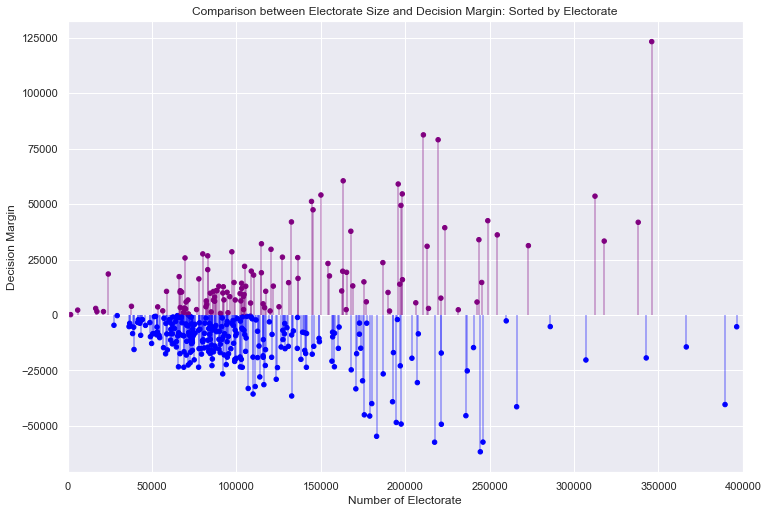

In [60]:
# Sorted by Electorate Size, purple shows stay while blue shows leave, analyzing rural versus major cities
x = df2['Electorate']
y = df2['Decision Margin']
my_color=np.where(y>=0, 'purple', 'Blue')
plt.scatter(x, y, color=my_color, s=20, alpha=1)
plt.xlim(0,400000)
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.title("Comparison between Electorate Size and Decision Margin: Sorted by Electorate")
plt.xlabel("Number of Electorate")
plt.ylabel("Decision Margin")

Text(0.5, 1.0, 'Electorate versus Decision Margin')

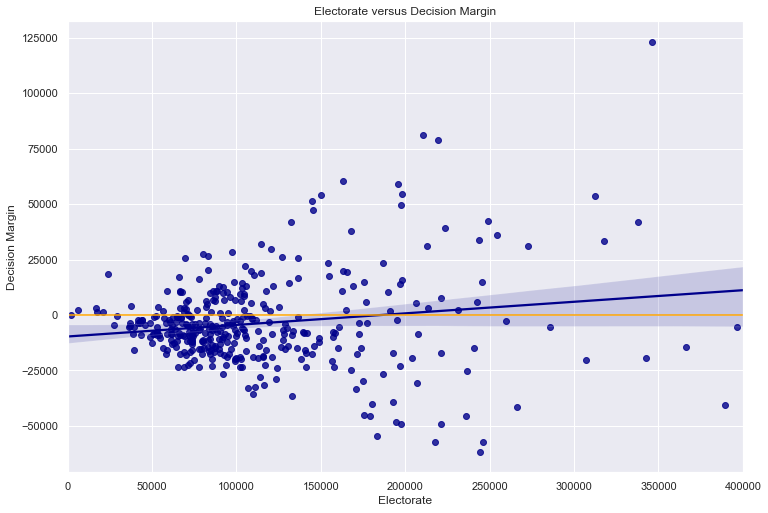

In [37]:
#Plotting on whether or not you can determine an error can be made 
ax = sns.regplot(x='Electorate', y="Decision Margin", color="DarkBlue", data=df2,)
ax = ax.axhline(0, 0, color='red')
plt.xlim(0,400000)
plt.title("Electorate versus Decision Margin")

In [16]:
#determining linear regression equation from line 34
X = df2['Electorate'].values.reshape(-1,1)
y = df2['Decision Margin'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("Linear Line Equation -> y = {:.5} + {:.5}x".format(reg.intercept_[0], reg.coef_[0][0]))

Linear Line Equation -> y = -9675.7 + 0.052185x


In [17]:
#looking at R-Squared Values and P vales
X = df2['Electorate']
y = df2['Decision Margin']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Decision Margin   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     22.49
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.00e-06
Time:                        17:57:01   Log-Likelihood:                -4340.1
No. Observations:                 382   AIC:                             8684.
Df Residuals:                     380   BIC:                             8692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9675.6843   1712.507     -5.650      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<Figure size 1152x576 with 0 Axes>

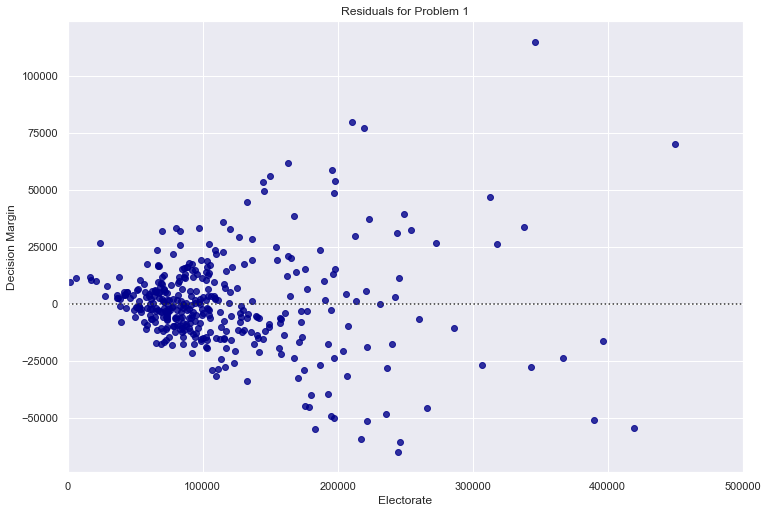

<Figure size 1152x576 with 0 Axes>

In [41]:
sns.residplot(x='Electorate', y="Decision Margin",color='DarkBlue', data=df2);
plt.xlim(0,500000)
plt.title("Residuals for Problem 1")
plt.figure(figsize=(16, 8))

Text(0.5, 1.0, 'All Voting Issues Added versus Electorate Size')

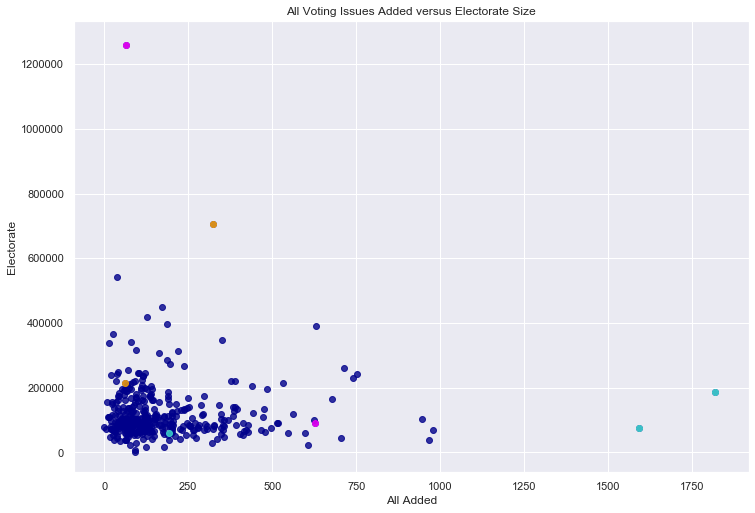

In [91]:
#More Outliers for Voting Reasons
sns.regplot(x='All Added', y="Electorate", color="DarkBlue",fit_reg = False, data= sample2)
new = sample2[sample2['Voting Area'].str.contains(r'^Bromsgrove')].copy()
sns.regplot(x='All Added', y="Electorate", color="turquoise",fit_reg = False, data=new)
new = sample2[sample2['Voting Area'].str.contains(r'^East Ayrshire')].copy()
sns.regplot(x='All Added', y="Electorate", color="Magenta",fit_reg = False, data=new)
new = sample2[sample2['Voting Area'].str.contains(r'^Northern')].copy()
sns.regplot(x='All Added', y="Electorate", color="Magenta",fit_reg = False, data=new)
new = sample2[sample2['Voting Area'].str.contains(r'^Birmingham')].copy()
sns.regplot(x='All Added', y="Electorate", color="Orange",fit_reg = False, data=new)
new = sample2[sample2['Voting Area'].str.contains(r'^Leicester')].copy()
sns.regplot(x='All Added', y="Electorate", color="Orange",fit_reg = False, data=new)
new = sample2[sample2['Voting Area'].str.contains(r'^Brent')].copy()
sns.regplot(x='All Added', y="Electorate", color="turquoise",fit_reg = False, data=new)

plt.title('All Voting Issues Added versus Electorate Size')